# Problemas de optimización escalar
Resuelva los siguientes problemas usando la librería `SymPy`. Use celdas en `Markdown` para explicar su procedimiento, así como los resultados obtenidos.

1. El perímetro de un triángulo isósceles es de $10 cm$. ¿Cuánto deben medir sus lados para que el volumen del cuerpo generado por la rotación del triángulo en torno a su base sea el mayor posible? (Volumen de un cono $= \frac{1}{3}\pi r^2 h$, donde $r$ es el radio de la base y $h$ la altura del cono).

**Planteamiento del problema:**
Me dan el valor del perímetro, el cual se obtiene con la siguiente fórmula: $p=10=2l+b$, donde $l$ representa cada lado y $b$ la base del triángulo. De ahí, despejo el valor de la base para tener todo en términos de $l$ :
$$ l=5-\frac{b}{2}$$

Ahora, si el triángulo va a girar sobre su propio eje, sé que el radio será igual a la mitad de $b$, y la altura a la altura del triángulo:
$$ r= \frac{b}{2}, \;\ h= \sqrt{\left(5-\frac{b}{2}\right)^2-\left(\frac{b}{2}\right)^2} $$

Sustituyendo el valor de r, obtengo:
$$ r= \frac{b}{2}, \;\;\ h= \sqrt{(5-r)^2-r^2} $$


Entonces, para maximizar el volumen, busco:

$$ \max_V = \frac{ \pi }{3}(\max_r)^2 \sqrt{(5-\max_r)^2-(\max_r)^2} $$

In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def V(r):
  return (sym.pi/3)*(r)**2*sym.sqrt((5-r)**2-r**2)

r=sym.var('r',positive=True)
V(r)

pi*r**2*sqrt(-r**2 + (5 - r)**2)/3

In [4]:
dV=sym.diff(V(r),r)
dV

-5*pi*r**2/(3*sqrt(-r**2 + (5 - r)**2)) + 2*pi*r*sqrt(-r**2 + (5 - r)**2)/3

In [5]:
c=sym.solve(dV,r)
c

[2]

In [9]:
# Definimos la función simbólica del volumen
V_expr = (sym.pi/3)*( r)**2 * sym.sqrt((5 - r)**2 -r**2)

<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in sqrt
  return (1/3)*pi*r**2*sqrt(-r**2 + (5 - r)**2)


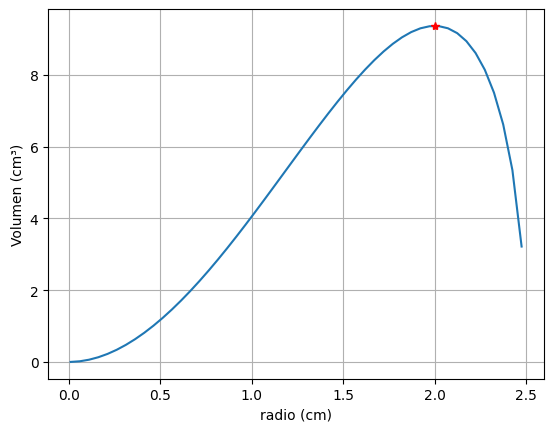

In [10]:
#Compruebo que 5 sea un máximo:
#Convierto la función de simbólica a numérica:
V_num = sym.lambdify(r, V_expr)

x_num = np.linspace(0.01, 4.99, 100)  # evitamos extremos donde la raíz puede ser problemática
plt.plot(x_num, V_num(x_num))
plt.plot(c[0],V(c[0]),'r*')
plt.xlabel('radio (cm)')
plt.ylabel('Volumen (cm³)')
plt.grid()

In [12]:
#Ya vimos que el radio máximo es 2, por lo tanto veremos cuál es el volumen máximo:
V(c[0])

4*sqrt(5)*pi/3

**Respuesta:**

El volumen máximo del cono se alcanza cuando el radio es igual a $ 2 \; \mathrm c \mathrm m $, lo que significa que la base medirá $ 4 \; \mathrm c \mathrm m $, y por ende, cada uno de los lados, $ 3 \; \mathrm c \mathrm m $.
____

2. Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol. Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?

**Planteamiento del problema**

Los 6 metros equivalen al valor del perímetro. Se va a construir un rectángulo abierto con dos postes y un travesaño, por lo que el área será $A=p*t$, donde $p$ es poste y $t$ travesaño.
También se sabe que $2p+t=6$, por lo que $p=3-\frac{t}{2}$

por lo tanto, obtenemos la función a maximizar:
$$ \max_A = (3-\frac{\max_t}{2})*\max_t $$
lo que equivale a
$$ \max_A = 3*\max_t- \frac{1}{2}*(\max_t)^2 $$

In [28]:
def A(t):
  return 3*t-(1/2)*(t**2)

In [29]:
t=sym.var('t',positive=True)
A(t)

-0.5*t**2 + 3*t

In [32]:
dA=sym.diff(A(t),t)
dA

3 - 1.0*t

In [34]:
c=sym.solve(dA,t)
c

[3.00000000000000]

In [35]:
#Ahora sé que el área máxima es con un travesaño de 3 metros,
#lo que se deriva en dos postes de 1.5 m

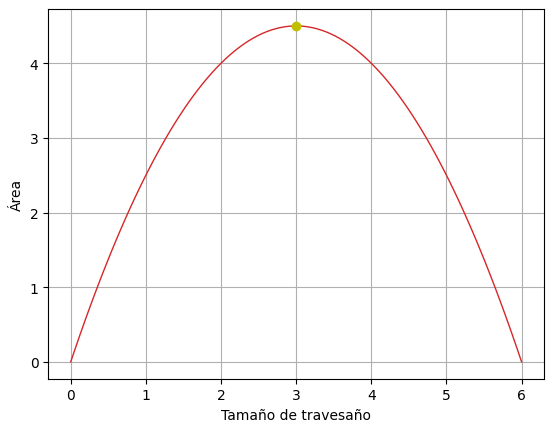

In [41]:
#Grafico para comprobar que sea un máximo:
t_num=np.linspace(0,6,100)
plt.plot(t_num,A(t_num),'C3',lw=1)
plt.plot(c[0],A(c[0]),'yo')
plt.ylabel('Área')
plt.xlabel('Tamaño de travesaño')
plt.grid()

**Resultado**

Ahora sé que tamaño 3 es un máximo, por lo que las medidas de mi portería para la mayor área serán de:
$$ 1.5 \mathrm m$$ cada poste, y $$ 3\mathrm m$$ el travesaño.